# Projeto - Análise de Notas de Filmes MovieLens

## Objetivo

Você atua no departamento de análise de dados em um Estúdio de Gravações Cinematográficas. O time de gestores(as) precisa de algumas informações sobre os votos do público a cerca dos últimos filmes. Existe uma pressão dos acionistas para que os próximos lançamentos tenham notas altas e uma aceitação grande pelo público geral.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

**Perguntas**

   1. Quantos filmes por gênero estamos incluindo nesse levantamento?
   2. Quais são os títulos com maiores notas de avaliação pelo público?
   3. Qual a média de votos por filme?
   4. Filmes possuem nota superior a qual valor? Qual o percentual?
   5. Qual a popularidade dos filmes, considerando como regra o número de votos dividido pelo número de filmes?
   6. Quais os gêneros mais indicados para investir, considerando a audiência? Se olhar as notas, ainda seriam esses os filmes?

**Dados:**

- https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/movies.csv
- https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/ratings.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
URL_movies = 'https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/movies.csv'
URL_ratings = 'https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/ratings.csv'

In [4]:
movies = pd.read_csv(URL_movies)
movies.set_index('movieId', inplace=True)

In [5]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv(URL_ratings)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
movies['release'] = movies['title'].str.extract("\((\d{4})\)")

In [9]:
movies.head()

,title,genres,release
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
genres = movies['genres'].str.get_dummies()

In [11]:
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
movies = movies.join(genres).drop(columns='genres', axis=1)
movies.head()

,title,release,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
movies.drop(columns='(no genres listed)', inplace=True)

In [14]:
movies.head()

,title,release,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
genres_count = genres.sum()

In [16]:
genres_count

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [17]:
genres_count.sort_values(ascending=False, inplace=True)

### Respondendo aos gestores

   1. Quantos filmes por gênero estamos incluindo nesse levantamento?

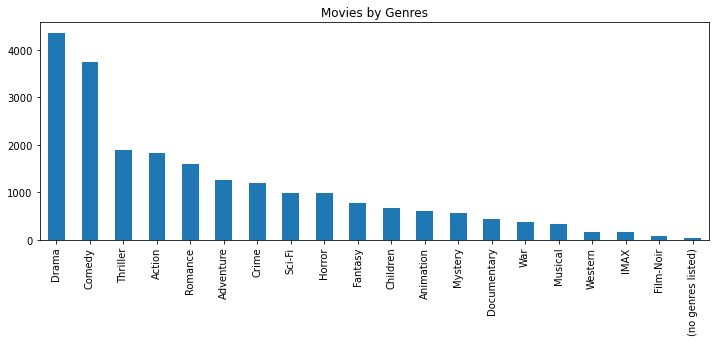

In [18]:
plt.figure(figsize=(12,4))
genres_count.plot(kind='bar')
plt.title('Movies by Genres')
plt.show()

2. Quais são os títulos com maiores notas de avaliação pelo público?

In [20]:
movies['avg_rtg'].sort_values(ascending=False)

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
         ... 
30892     NaN
32160     NaN
32371     NaN
34482     NaN
85565     NaN
Name: avg_rtg, Length: 9742, dtype: float64

In [22]:
movies['avg_rtg'] = ratings.groupby('movieId').mean()['rating']

In [23]:
movies['votes'] = ratings.groupby('movieId').count()['rating']

In [24]:
#temos muitos caso extremos, onde tivemos poucas avaliações considerando a amplitude da qtd de votos. Assim,
#optamos por remover aqueles com menos de 75 votos
movies = movies[movies['votes'] >= 75]

In [25]:
movies[['title','avg_rtg', 'votes']].head()

,title,avg_rtg,votes
movieId,,,
1,Toy Story (1995),3.920930,215.0
2,Jumanji (1995),3.431818,110.0
6,Heat (1995),3.946078,102.0
10,GoldenEye (1995),3.496212,132.0
16,Casino (1995),3.926829,82.0


In [26]:
movies['avg_rtg'].sort_values(ascending=False)[:5]

movieId
318     4.429022
858     4.289062
2959    4.272936
750     4.268041
904     4.261905
Name: avg_rtg, dtype: float64

3. Qual a média de votos por filme?

In [27]:
movies['avg_rtg'].mean()

3.7597293831178678

<AxesSubplot:xlabel='avg_rtg', ylabel='Density'>

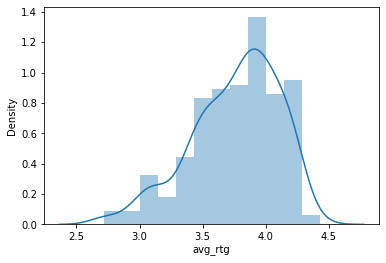

In [28]:
sns.distplot(movies['avg_rtg'])

<AxesSubplot:xlabel='avg_rtg', ylabel='Density'>

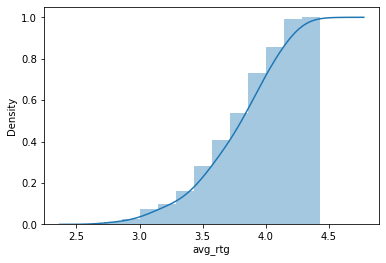

In [29]:
sns.distplot(movies['avg_rtg'], hist_kws= {'cumulative':True}, kde_kws= {'cumulative':True})

4. Filmes possuem nota superior a qual valor? Qual o percentual?

In [30]:
perc_avg = movies['avg_rtg'].quantile(0.80)
print('De acordo com o grafico anterior, consideramos que apenas 20% dos filmes possuem nota superior a '
      + str(round(perc_avg,2)))

De acordo com o grafico anterior, consideramos que apenas 20% dos filmes possuem nota superior a 4.06


In [31]:
genres_count_clean = movies[['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']].sum().sort_values(ascending=False)

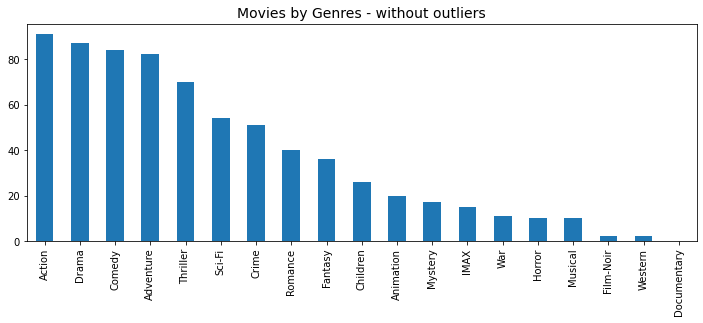

In [32]:
plt.figure(figsize=(12,4))
genres_count_clean.plot(kind='bar')
plt.title('Movies by Genres - without outliers', fontsize=14)
plt.show()


   5. Qual a popularidade dos filmes, considerando como regra o número de votos dividido pelo número de filmes?


In [33]:
genres_count_clean.sum()

708

In [38]:
dicio = {}
genres = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

for genre in genres:
    dicio.update({
                    genre : movies[movies[genre] == 1].count().votes / genres_count_clean.sum() * 100
                  } )
    
    
popularity = pd.DataFrame(list(dicio.items())).sort_values(by=1, ascending=False)

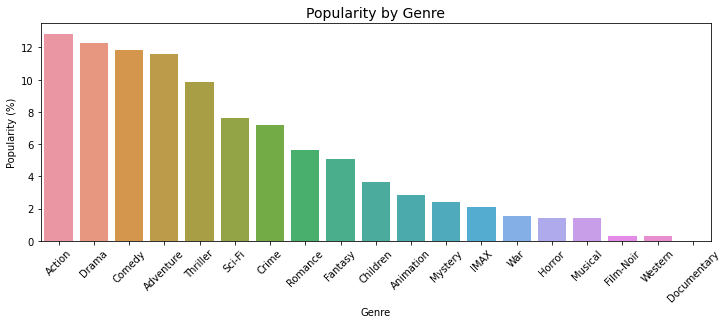

In [39]:

plt.figure(figsize=(12,4))
sns.barplot(data=popularity, x=0, y=1)
plt.xticks(rotation=45)
plt.ylabel('Popularity (%)')
plt.xlabel('Genre')
plt.title('Popularity by Genre', fontsize=14)
plt.show()

   6. Quais os gêneros mais indicados para investir, considerando a audiência? Se olhar as notas, ainda seriam esses os filmes?

In [40]:
dicio = {}
genres = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

for genre in genres:
    dicio.update({
                    genre : movies[movies[genre] == 1].mean().avg_rtg 
                  } )
    
    
ratings = pd.DataFrame(list(dicio.items())).sort_values(by=1, ascending=False)


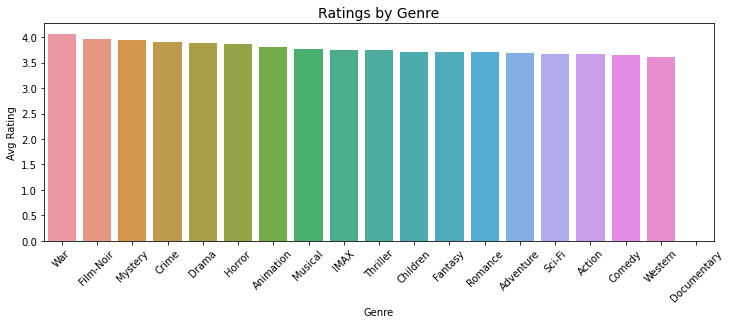

In [41]:
plt.figure(figsize=(12,4))
sns.barplot(data=ratings, x=0, y=1)
plt.xticks(rotation=45)
plt.ylabel('Avg Rating')
plt.xlabel('Genre')
plt.title('Ratings by Genre', fontsize=14)
plt.show()

**Resposta:**

Se o critério for popularidade, para assegurar que teremos procura do público pelo filme, título do gênero Ação parece ser uma escolha viável, mesmo que a média de avaliação não seja tão alta quanto outros gêneros.